## Main Task
In the insurance industry, predicting the likelihood of claims is critical for risk assessment and policy pricing. However, insurance claims datasets often exhibit class imbalance, with non-claims outnumbering actual claims. (Classification On A Highly Imbalanced Data)

**Imbalanced Data:** refers to a dataset where the classes are not represented equally. In a classification task, this typically means that one class (or a few classes) occurs much more frequently than others. For example, in a binary classification problem, you might have 95% of the data belonging to class A and only 5% to class B.  

### Challenges of Imbalanced Data:
1. **Bias Toward Majority Class:** Standard machine learning algorithms often assume a relatively equal class distribution. When faced with imbalanced data, these algorithms may be biased towards the majority class, leading to poor predictive performance on the minority class.

2. **Skewed Performance Metrics:** Traditional metrics like accuracy can be misleading in the context of imbalanced data. For instance, in the previous example, a model that always predicts class A would achieve 95% accuracy but would fail entirely to capture class B.

### Strategies to Handle Imbalanced Data:
#### Resampling Techniques:
1. **Oversampling:** Increasing the number of instances in the minority class by duplicating instances or generating synthetic data (e.g., using SMOTE - Synthetic Minority Over-sampling Technique).
2. **Undersampling:** Reducing the number of instances in the majority class to balance the dataset.
#### Algorithmic Solutions:
1. **Weighted Loss Functions:** Modify the loss function to give more importance to the minority class, which can help the model to pay more attention to it during training.
2. **Ensemble Methods:** Methods like Random Forest or Boosting can be adjusted to handle imbalanced data, such as by using balanced random forests or boosting with class weights.
3. **Anomaly Detection Techniques:** In cases where the minority class is extremely rare, anomaly detection methods might be more suitable.

### Data Understanding
The dataset has the following features:
1. policy_id: Unique identifier for the insurance policy.
2. subscription_length: The duration for which the insurance policy is active.
3. customer_age: Age of the insurance policyholder, which can influence the likelihood of claims.
4. vehicle_age: Age of the vehicle insured, which may affect the probability of claims due to factors like wear and tear.
5. model: The model of the vehicle, which could impact the claim frequency due to model-specific characteristics.
6. fuel_type: Type of fuel the vehicle uses (e.g., Petrol, Diesel, CNG), which might influence the risk profile and claim likelihood.
7. max_torque, max_power: Engine performance characteristics that could relate to the vehicle’s mechanical condition and claim risks.
8. engine_type: The type of engine, which might have implications for maintenance and claim rates.
9. displacement, cylinder: Specifications related to the engine size and construction, affecting the vehicle’s performance and potentially its claim history.
10. region_code: The code representing the geographical region of the policyholder, as claim patterns can vary regionally.
11. region_density: Population density of the policyholder’s region, which could correlate with accident and claim frequencies.
12. airbags: The number of airbags in the vehicle, indicating safety level which can influence claim probability.
13. is_esc (Electronic Stability Control), is_adjustable_steering, is_tpms (Tire Pressure Monitoring System): Features that enhance vehicle safety and could potentially reduce the likelihood of claims.
14. is_parking_sensors, is_parking_camera: Parking aids that might affect the probability of making a claim, especially in urban areas.
15. rear_brakes_type: Type of rear brakes, which could be related to the vehicle’s stopping capability and safety.
Features like steering_type, turning_radius, length, width, gross_weight, and various other binary indicators (Yes/No) for specific vehicle amenities and safety features, which together build a profile of the vehicle’s characteristics and its associated risk factors.
16. claim_status: Indicates whether a claim was made (1) or not (0), which is the dependent variable the model aims to predict.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('datasets/insurance claims data.csv')

In [3]:
dataset.head(2)

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [5]:
dataset.shape

(58592, 41)

In [6]:
dataset.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

### Exploratory Data Analysis
#### Distribution of Claim Status

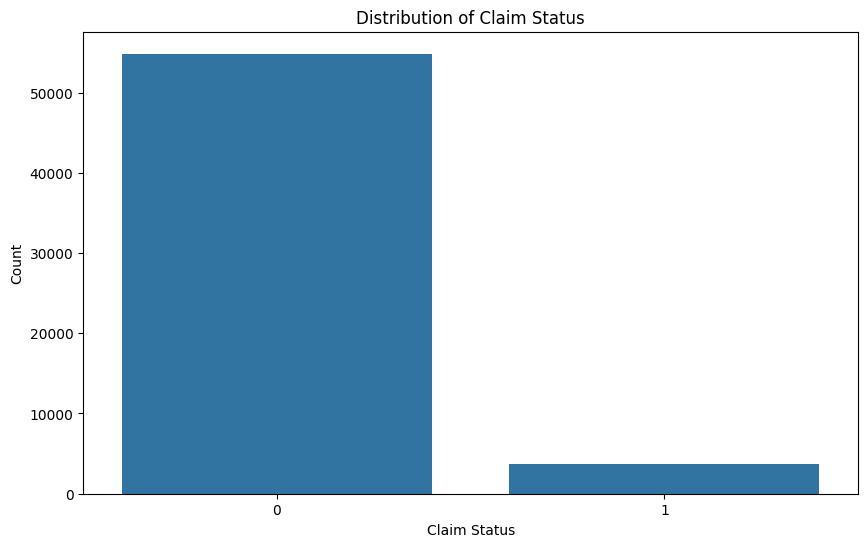

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='claim_status', data=dataset)
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

> The distribution of the claim_status shows a significant imbalance between the classes, with much fewer claims (1) compared to no claims (0)!
#### 